In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [73]:
#1
df = pd.read_csv('medical_examination.csv', delimiter=',')

In [74]:
#2
BMI = df['weight'] /((df['height']/100)**2)



In [80]:
#2
BMI = df['weight'] /((df['height']/100)**2)
df['overweight'] = np.where(BMI > 25, 1, 0)
df['overweight']

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int64

In [76]:
#3 normalization
df['cholesterol'] = np.where(df['cholesterol'] > 1 , 1, 0)
df['gluc'] = np.where(df['gluc'] > 1 , 1, 0)

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [59]:
#4
df_melt= df.melt(id_vars='cardio', value_vars=['overweight', 'cholesterol', 'active','gluc','smoke','alco'],
                  var_name='variable', value_name='value')



In [60]:
df_grouped = df_melt.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

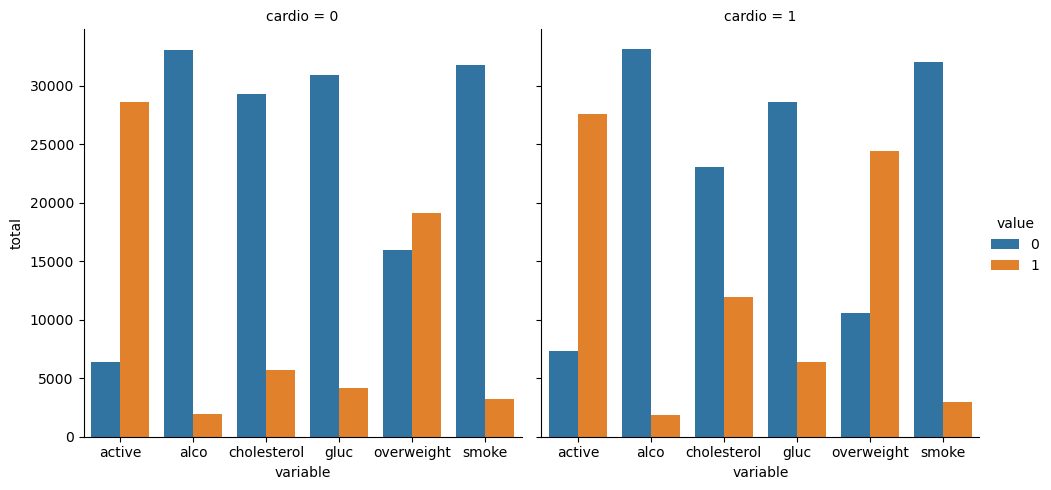

In [61]:
sns.catplot(data=df_grouped, x="variable", y='total', hue="value", col = 'cardio', kind="bar")

In [43]:
print(df['cardio'].value_counts())

cardio
0    35021
1    34979
Name: count, dtype: int64


In [44]:
pd.crosstab(df['cardio'], df['active'])
pd.crosstab(df['cardio'], df['alco'])

alco,0,1
cardio,,
0,33080,1941
1,33156,1823


In [62]:
df['gluc'].value_counts()
#df['cholesterol'].value_counts()
plt.show()

In [77]:
#HEATMAP

'''Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:

    diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    height is more than the 97.5th percentile
    weight is less than the 2.5th percentile
    weight is more than the 97.5th percentile
    '''

df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] >= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] >= df['weight'].quantile(0.975))]
df_heat.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
62,81,20330,2,187,115.0,130,90,0,0,0,1,1,0,1
435,618,16765,1,186,200.0,130,70,0,0,0,0,0,0,1
751,1051,19662,2,183,114.0,120,80,0,0,0,0,0,0,1
990,1375,20116,2,185,116.0,150,90,1,0,0,0,1,1,1
1025,1430,23306,2,180,108.0,170,100,0,0,0,0,1,1,1


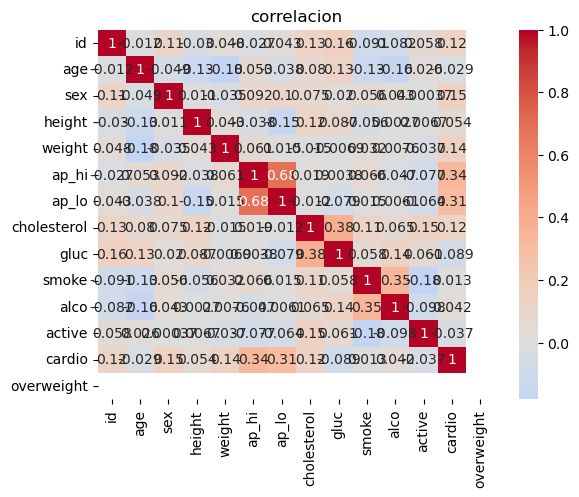

NameError: name 'fig' is not defined

In [88]:

corr = df_heat.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title('correlacion')
plt.show()
fig.savefig('heatmap.png')
return fig

NameError: name 'fig' is not defined